機械学習の演習課題

線形回帰で燃費予想を行う

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
os.getcwd()

'C:\\Users\\User\\Desktop\\AI講座用フォルダ\\4_後半通し課題データ\\notebook'

生データをデータの読み込み、表示する

In [3]:
#ファイル選択
df_car_consume = pd.read_csv(r"..\car-consume\measurements.csv")

#頭と尻の10行づつ表示
display(df_car_consume.head(10))
display(df_car_consume.tail(10))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
378,"16,2","4,4",39,"24,5",17,ac,SP98,1,0,0,NaN,NaN
379,"16,7","3,8",44,"24,5",23,sun,SP98,0,0,1,NaN,NaN
380,"8,3",5,52,"24,5",27,NaN,SP98,0,0,0,NaN,NaN
381,"5,5","3,7",33,"24,5",28,sun,SP98,0,0,1,NaN,NaN
382,"13,6","3,7",33,"24,5",28,sun,SP98,0,0,1,NaN,NaN
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


カンマとピリオドの表記が異なっているため、直さないといけない。
replace(',', '.')を使う

In [29]:
#入れ替え
df_car_consume = pd.read_csv(r"..\car-consume\measurements.csv")
df_car_consume = df_car_consume.replace(',','.',regex = True)
df_car_consume["distance"] = df_car_consume["distance"].astype(np.float64)
df_car_consume["consume"] = df_car_consume["consume"].astype(np.float64)
df_car_consume["temp_inside"] = df_car_consume["temp_inside"].astype(np.float64)

#頭と尻の10行づつ表示
display(df_car_consume.head(10))
display(df_car_consume.tail(10))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
378,16.2,4.4,39,24.5,17,ac,SP98,1,0,0,NaN,NaN
379,16.7,3.8,44,24.5,23,sun,SP98,0,0,1,NaN,NaN
380,8.3,5.0,52,24.5,27,NaN,SP98,0,0,0,NaN,NaN
381,5.5,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN
382,13.6,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN


燃料種も追加変更してみる。

In [30]:
#ガス種コピー
df_car_consume["gas_type_1"] = df_car_consume["gas_type"]
df_car_consume["gas_type_2"] = df_car_consume["gas_type"]

#リプレイスする
df_car_consume["gas_type_1"] = df_car_consume["gas_type_1"].replace('E10','1',regex = True)
df_car_consume["gas_type_1"] = df_car_consume["gas_type_1"].replace('SP98','0',regex = True)
df_car_consume["gas_type_2"] = df_car_consume["gas_type_2"].replace('E10','0',regex = True)
df_car_consume["gas_type_2"] = df_car_consume["gas_type_2"].replace('SP98','1',regex = True)
df_car_consume["gas_type_1"] = df_car_consume["gas_type_1"].astype(np.int64)
df_car_consume["gas_type_2"] = df_car_consume["gas_type_2"].astype(np.int64)

#頭と尻の10行づつ表示
display(df_car_consume.head(10))
display(df_car_consume.tail(10))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,gas_type_1,gas_type_2
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10,1,0
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN,1,0
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN,1,0
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN,1,0
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN,1,0
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN,1,0
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN,1,0
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN,1,0
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN,1,0
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN,1,0


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,gas_type_1,gas_type_2
378,16.2,4.4,39,24.5,17,ac,SP98,1,0,0,NaN,NaN,0,1
379,16.7,3.8,44,24.5,23,sun,SP98,0,0,1,NaN,NaN,0,1
380,8.3,5.0,52,24.5,27,NaN,SP98,0,0,0,NaN,NaN,0,1
381,5.5,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN,0,1
382,13.6,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN,0,1
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN,0,1
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN,0,1
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN,0,1
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN,0,1
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN,0,1


欠損値が無いか確認を行う。 count()関数なり。

In [31]:
df_car_consume.count()

distance         388
consume          388
speed            388
temp_inside      376
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
gas_type_1       388
gas_type_2       388
dtype: int64

temp_insideに欠損値があるみたい。
とりあえず、平均値で埋めることにしてみる。
temp_insideの平均値をまず求める。

In [32]:
df_car_consume["temp_inside"].mean()

21.929521276595743

In [37]:
#平均値でリプレイスする
ave = df_car_consume["temp_inside"].mean()
df_car_consume["temp_inside"] = df_car_consume["temp_inside"].fillna(ave)
df_car_consume.count()

distance         388
consume          388
speed            388
temp_inside      388
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
gas_type_1       388
gas_type_2       388
dtype: int64

In [38]:
#頭と尻の10行づつ表示
display(df_car_consume.head(10))
display(df_car_consume.tail(10))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,gas_type_1,gas_type_2
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10,1,0
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN,1,0
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN,1,0
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN,1,0
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN,1,0
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN,1,0
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN,1,0
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN,1,0
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN,1,0
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN,1,0


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,gas_type_1,gas_type_2
378,16.2,4.4,39,24.5,17,ac,SP98,1,0,0,NaN,NaN,0,1
379,16.7,3.8,44,24.5,23,sun,SP98,0,0,1,NaN,NaN,0,1
380,8.3,5.0,52,24.5,27,NaN,SP98,0,0,0,NaN,NaN,0,1
381,5.5,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN,0,1
382,13.6,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN,0,1
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN,0,1
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN,0,1
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN,0,1
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN,0,1
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN,0,1


こんな↑感じのデータ。

各カラムの意味は以下の通り。

・distance is the distance inkilometers i was driving.
　つまり、 運転した距離（km）

・consume is the sonsumption in liters per 100 kilometers as seen in the display.
　つまり、ディスプレイ表示上の消費した燃料量（ℓ/100km）

・speed is the average speed.つまり、平均速度

・temp_inside is the setting of the heating or "NaN" if it was turned off.
　つまり、暖房の設定値であり、値がNaNの場合は暖房OFFにしている

・temp_outside is the temperature outside, taken at the end of the ride.
　つまり、降車する際の外気温。

・specials is a remark if it was raining, snowing or if the climatization was on ("AC").
　つまり、雨や雪または気候変動によってAC(エアコン）をオンにしている場合に書き込んでいる

・gas type is the gas type used during the last refill.
　つまり、最後に補給したガス種別

・AC is one hot encoded, the special "AC". 1 for on, 0 for off.
　つまり、ACは、「AC（エアコン）」のエンコード値です。 オンの場合は1、オフの場合は0。

・rain is one-hot-encoded, the special "rain" and "snow". 1 for it was raining/snowing, 0 for it
was good weather.
　つまり、「雨」と「雪」のエンコード値です。 雨/雪が降っていた場合は1、0は良い天気。

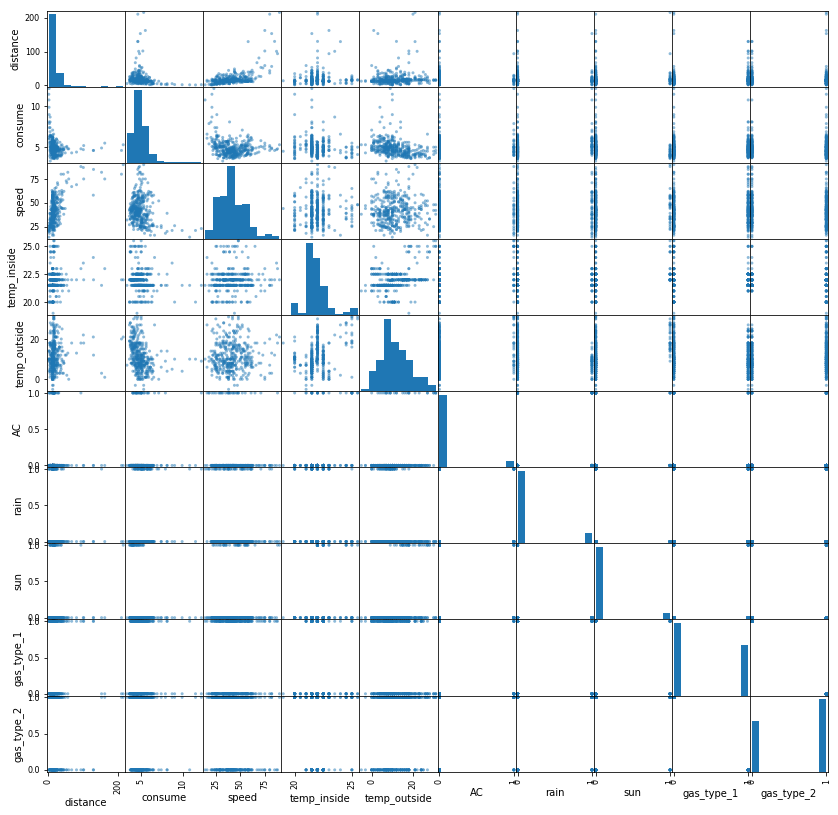

In [39]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_car_consume, figsize=(14,14))
plt.show()

In [40]:
# 相関係数を確認
df_car_consume.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_1,gas_type_2
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.053411,-0.053411
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,0.015327,-0.015327
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,0.097360,-0.097360
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.010198,0.010198
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.148705,0.148705
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.105285,0.105285
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,-0.060328,0.060328
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.022761,0.022761
gas_type_1,0.053411,0.015327,0.097360,-0.010198,-0.148705,-0.105285,-0.060328,-0.022761,1.000000,-1.000000
gas_type_2,-0.053411,-0.015327,-0.097360,0.010198,0.148705,0.105285,0.060328,0.022761,-1.000000,1.000000


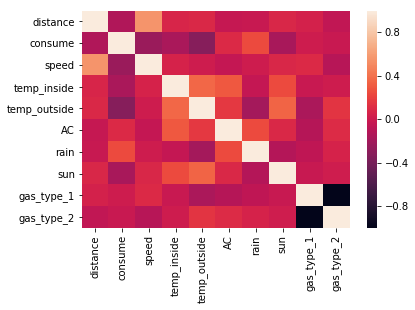

In [41]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_car_consume.corr())
plt.show()

相関を見る限り、燃費である目的変数「consume」に関係していると考えられる
説明変数は次の通り。

speed>>>-0.23

temp_outside>>>-0.32

rain>>>0.25

上記説明変数から目的変数を求めてみたい。
まず、説明変数を１つで実施する。

w00 = 5.638, w01 = -0.017, 二乗誤差 = 84302.708


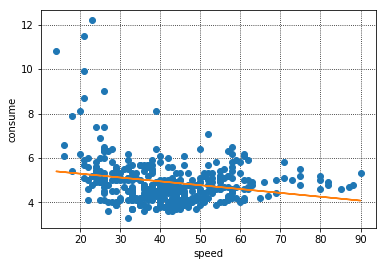

In [42]:
#consumeとspeedの線形回帰
# 係数を求める
y = df_car_consume["consume"].values
X1 = df_car_consume["speed"].values
X1 = X1.reshape(-1,1)#リシェープ！
regr = LinearRegression(fit_intercept=True)
regr.fit(X1, y)

# 重みを取り出す
w00 = regr.intercept_
w01 = regr.coef_[0]

y_est_sklearn = w00 + w01 * X1
squared_error = 0.5 * np.sum((y_est_sklearn - y) ** 2)
print('w00 = {:.3f}, w01 = {:.3f}, 二乗誤差 = {:.3f}'.format(w00, w01, squared_error))

#グラフに重ねて表示する
plt.plot(X1, y, 'o')
plt.ylabel("consume")
plt.xlabel("speed")
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='yellow',linestyle=':')
plt.plot(X1, y_est_sklearn)
plt.show()

w02 = 5.451, w03 = -0.047, 二乗誤差 = 88389.640


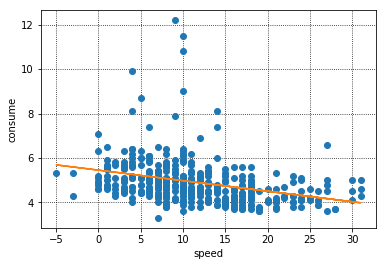

In [43]:
#consumeとtemp_outsideの線形回帰
# 係数を求める
y = df_car_consume["consume"].values
X2 = df_car_consume["temp_outside"].values
X2 = X2.reshape(-1,1)#リシェープ！
regr = LinearRegression(fit_intercept=True)
regr.fit(X2, y)

# 重みを取り出す
w02 = regr.intercept_
w03 = regr.coef_[0]

y_est_sklearn = w02 + w03 * X2
squared_error = 0.5 * np.sum((y_est_sklearn - y) ** 2)
print('w02 = {:.3f}, w03 = {:.3f}, 二乗誤差 = {:.3f}'.format(w02, w03, squared_error))

#グラフに重ねて表示する
plt.plot(X2, y, 'o')
plt.ylabel("consume")
plt.xlabel("speed")
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='yellow',linestyle=':')
plt.plot(X2, y_est_sklearn)
plt.show()

w04 = 4.816, w05 = 0.778, 二乗誤差 = 85075.224


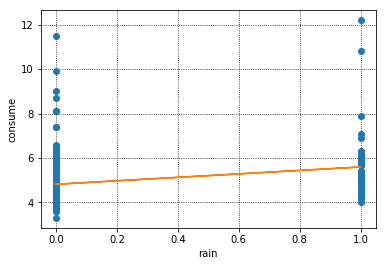

In [44]:
#consumeとrainの線形回帰
# 係数を求める
y = df_car_consume["consume"].values
X3 = df_car_consume["rain"].values
X3 = X3.reshape(-1,1)#リシェープ！
regr = LinearRegression(fit_intercept=True)
regr.fit(X3, y)

# 重みを取り出す
w04 = regr.intercept_
w05 = regr.coef_[0]

y_est_sklearn = w04 + w05 * X3
squared_error = 0.5 * np.sum((y_est_sklearn - y) ** 2)
print('w04 = {:.3f}, w05 = {:.3f}, 二乗誤差 = {:.3f}'.format(w04, w05, squared_error))

#グラフに重ねて表示する
plt.plot(X3, y, 'o')
plt.ylabel("consume")
plt.xlabel("rain")
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='yellow',linestyle=':')
plt.plot(X3, y_est_sklearn)
plt.show()

どれも何となく微妙です。
説明変数3つまとめて考えてみる。


In [46]:
#consumeと説明変数3つとの線形回帰
# 係数を求める
y = df_car_consume["consume"].values
X4 = df_car_consume[['speed','temp_outside','rain']].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X4, y)

# 重みを取り出す
w06 = regr.intercept_
w07 = regr.coef_[0]
w08 = regr.coef_[1]
w09 = regr.coef_[2]

x1 = df_car_consume['speed'].values
x2 = df_car_consume['temp_outside'].values
x3 = df_car_consume['rain'].values

# 重みと二乗誤差の確認
y_est = w06 + w07 * x1 + w08 * x2 + w09 * x3
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w06 = {:.3f}, w07 = {:.3f}, w08 = {:.3f}, w09 = {:.3f}'.format(w06, w07, w08, w09))
print('二乗誤差 = {:.3f}'.format(squared_error))

w06 = 6.024, w07 = -0.017, w08 = -0.041, w09 = 0.621
二乗誤差 = 167.210


説明変数が３つだと二乗誤差が良い値になった。
これを評価してみる。

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
# MSEを計算
mse = mean_squared_error(y, y_est) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_est) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.862
MAE = 0.619
RMSE = 0.928
